# Criando Matriz e vetor

In [1]:
import numpy as np

## vetores

In [3]:
a = [[1],[2],[3],[4],[5]]

In [4]:
np.shape(a)

(5, 1)

In [5]:
a[-1]

[5]

In [6]:
a[1:]

[[2], [3], [4], [5]]

## Matriz

In [7]:
A = [[1,2,3],[4,5,6]]

In [8]:
np.shape(A)

(2, 3)

$A_{ij}$

- i = Número da linha
- j = Número da Coluna

In [9]:
for i in range(2):
    for j in range(3):
        print(f"Acessando a linha {i} e a coluna {j} valor {A[i][j]}")

Acessando a linha 0 e a coluna 0 valor 1
Acessando a linha 0 e a coluna 1 valor 2
Acessando a linha 0 e a coluna 2 valor 3
Acessando a linha 1 e a coluna 0 valor 4
Acessando a linha 1 e a coluna 1 valor 5
Acessando a linha 1 e a coluna 2 valor 6


# Criando com o numpy

In [10]:
A = np.array(A)

In [11]:
A.shape

(2, 3)

## Matrizes especiais

In [18]:
#zeros
zero = np.zeros((4,5))

In [19]:
zero

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [20]:
#ones
ones = np.ones((6,6))

In [21]:
ones.shape

(6, 6)

In [22]:
#identidade
identidade = np.eye(10)

In [23]:
identidade

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Construindo Matrizes

In [24]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
B = np.arange(1,7).reshape((2,3))

In [27]:
B

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
vetor = np.arange(1,4).reshape((3,1))

## Multiplicação Vetor e Matriz

In [32]:
A.shape, vetor.shape

((2, 3), (3, 1))

In [30]:
A.dot(vetor)

array([[14],
       [32]])

In [33]:
vetor_errado = np.arange(1,3).reshape((2,1))

In [34]:
vetor_errado.shape

(2, 1)

In [36]:
type(A)

numpy.ndarray

In [35]:
A.dot(vetor_errado)

ValueError: shapes (2,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)

In [37]:
C = [[1,2,3]]

In [39]:
C = np.array(C)

## Operações

### Matriz transposta

In [41]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

### Matriz inversa

In [43]:
from numpy.linalg import inv

In [45]:
quadrada = np.arange(1,5).reshape(2,2)

In [46]:
quadrada

array([[1, 2],
       [3, 4]])

In [48]:
inv_quadrada = inv(quadrada)

In [53]:
quadrada.dot(inv_quadrada)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

## Operações 

### Soma

In [56]:
A + A

array([[ 2,  4,  6],
       [ 8, 10, 12]])

### Multiplicação/divisão

In [57]:
3*A

array([[ 3,  6,  9],
       [12, 15, 18]])

# Iterativo vs Vetorização 

In [63]:
from numpy.random import randint
from numpy.random import randn

In [61]:
import seaborn as sns

In [59]:
tamanho_das_casas = randint(50,1001,size=10000)

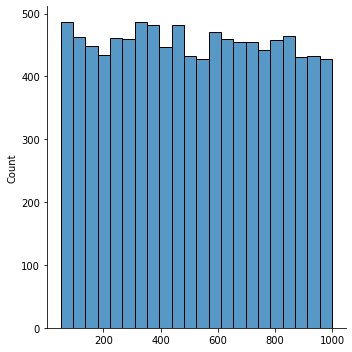

In [62]:
sns.displot(tamanho_das_casas)

$h_{\theta}=40+0.25x$

## Iterativo

In [74]:
#lambda
calcula_preco = lambda x: 40+0.25*x

In [77]:
%%timeit
preco_iterativo = []
for tamanho in tamanho_das_casas:
    preco_iterativo.append(calcula_preco(tamanho))

132 ms ± 5.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [78]:
len(preco_iterativo)

10000

## Vetorizado

In [79]:
len(tamanho_das_casas)

10000

In [80]:
Matriz_Casa = np.ones((len(tamanho_das_casas),1))

In [84]:
tamanho_das_casas[0:3]

array([334, 839, 557])

In [85]:
Matriz_Casa = np.c_[Matriz_Casa,tamanho_das_casas]

In [86]:
Matriz_Casa[0:3]

array([[  1., 334.],
       [  1., 839.],
       [  1., 557.]])

In [87]:
vetor_hipotese = np.array([[40],[0.25]])

In [88]:
vetor_hipotese

array([[40.  ],
       [ 0.25]])

In [92]:
preco_vetor = []

In [97]:
#%%timeit
preco_vetor = Matriz_Casa.dot(vetor_hipotese)

## Comparação

In [99]:
import matplotlib.pyplot as plt

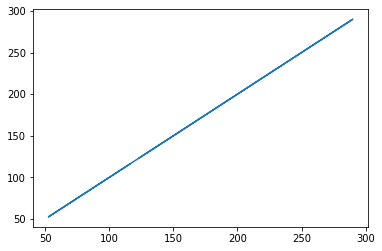

In [100]:
plt.plot(preco_iterativo,preco_vetor)